# What kind of people are likely to survive on the Titanic?
## Course project of Intro to Data Analysis from Udacity

In [16]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

This is a well-known data set from Kaggle. Normally, people use machine learning methods to study what variables are important to the survival and predict whether a person would survive given his or her data. Here, I am just using the functions covered in the course for practice.

As the first step, I download the [data set](https://www.kaggle.com/c/titanic/data) and look at its structure.

In [12]:
# The first column is treated as the index column
titanic = pd.read_csv("titanic_data.csv", index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see, there are 11 variables. The binary variable called Survived is the response.

Then I decide to remove the name and ticket columns since I don't think they are relavent to survival. The cabin column is also removed since there are too many missing values and it's not clear to me what the cabin numbers stand for.

In [13]:
# This part can be run only once
titanic.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [14]:
# get the size of the dataframe
titanic.shape

(891, 8)

Now the table becomes much clearer. There are 891 observations and 8 variables. 

Then I can start to study the relationship between Surveved and other variables.

### The relationship between Survived and Pclass

In [25]:
ratePclass = titanic.groupby('Pclass')['Survived'].mean()
print ratePclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


It is clear that the 1st class has the highest survival rate and the 3rd class has the lowest survival rate, which can also be shown in the following plot.

Populating the interactive namespace from numpy and matplotlib


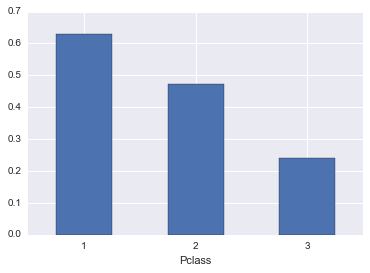

In [107]:
%pylab inline
ratePclass.plot(kind='bar', rot=0)

Therefore, the higher the passenger class, the higher the survival rate.

### The relationship between Survived and Sex

Similarly, I can study the survival rate of male and female.

In [48]:
rateSex = titanic.groupby('Sex')['Survived'].mean()
print rateSex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


It can be seen that the female have a much higher survival rate.

### The relationship between Survived and Age

In [51]:
rateAge = titanic.groupby('Survived')['Age'].mean()
print rateAge

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


The ages between the survived and non-survived are not quite different.

### The relationship between Survived and Number of Siblings/Spouses Aboard

In [55]:
rateSibSp = titanic.groupby('SibSp')['Survived'].mean()
print rateSibSp

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


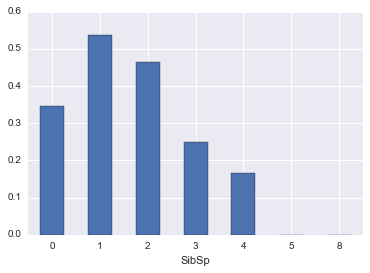

In [105]:
rateSibSp.plot(kind='bar', rot=0)

People with 1 or 2 siblings/spouses aboard are more likely to survive.

### The relationship between Survived and Number of Parents/Children Aboard

In [61]:
rateParch = titanic.groupby('Parch')['Survived'].mean()
print rateParch

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


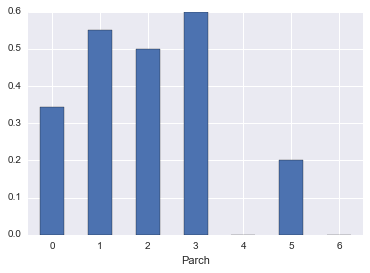

In [108]:
rateParch.plot(kind='bar', rot=0)

People with 1 to 3 parents/children aboard are more likely to survive.

### The relationship between Survived and Fare

In [111]:
rateFareGroup = titanic.groupby('Survived')['Fare']
print rateFareGroup.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

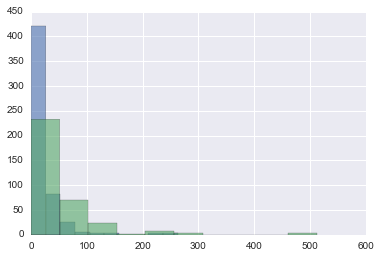

In [117]:
rateFareGroup.apply(lambda x: x.hist(alpha = 0.6))

The survived people have higher fares, which may also corresponds to passenger class.

### The relationship between Survived and Port of Embarkation

In [97]:
rateEmbark = titanic.groupby('Embarked')['Survived'].mean()
print rateEmbark

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


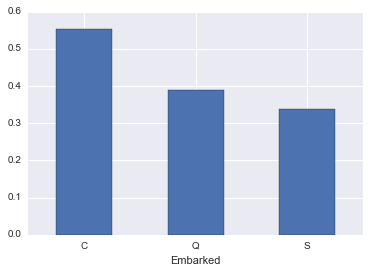

In [109]:
rateEmbark.plot(kind='bar', rot=0)